In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
result = pd.read_csv('test_result/result_integrate.csv')
result.head()

,MODEL,LOSS,F1-score
0,unet,BCE,0.812040
1,unet,BCE,0.887671
2,unet,BCE,0.020000
3,unet,BCE,0.775372
4,unet,BCE,0.831025


In [31]:
# Function for the boxplot
def boxplot(data, name=None, hue=None, save=True, title=False):
    # settings for figure
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.rc('font', size=16)  
    plt.figure(facecolor='white')
    sns.set_palette('pastel')

    ax1 = plt.subplot(1, 1, 1)
    if hue is not None:
        sns.boxplot(x='LOSS', y='F1-score', hue=hue, data=data)
    else:
        sns.boxplot(x='LOSS', y='F1-score', data=data)
    plt.ylabel(' ')
    plt.xlabel('LOSS')
    '''
    ax2 = plt.subplot(1, 2, 2)
    if hue is not None:
        sns.boxplot(x='LOSS', y='F1-score', hue=hue, data=data)
    else:
        sns.boxplot(x='LOSS', y='F1-score', data=data)
    plt.ylabel(' ')
    plt.xlabel('LOSS')
    '''
    name = name if name is not None else str(data)
    plt.title('F1-Score')
    if title:
        plt.suptitle(name, fontsize=25)
    
    if save:
        file_name = 'boxplot_'+name+'_by'+hue+'.png' if hue is not None else 'boxplot_'+name+'.png' 
        plt.savefig(file_name, dpi=300)
    plt.show()

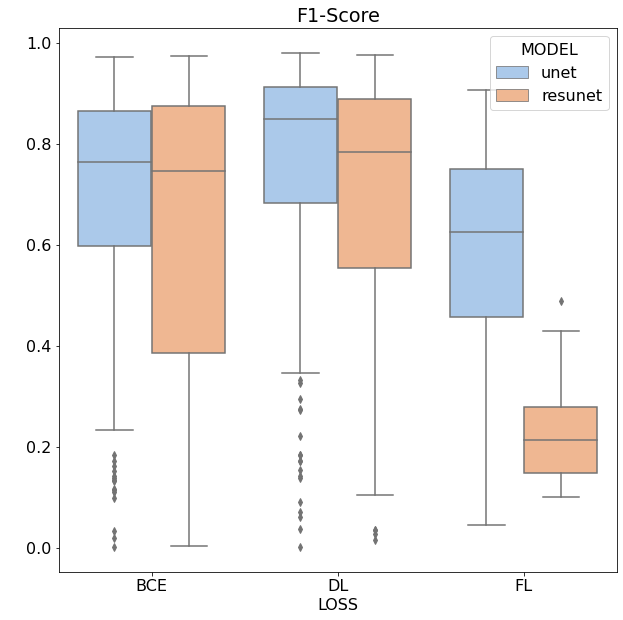

In [32]:
boxplot(result, name='ALL', hue='MODEL')

In [24]:
u = result.loc[result['MODEL']=='unet']
r = result.loc[result['MODEL']=='resunet']

u_b = u.loc[u['LOSS']=='BCE']
u_d = u.loc[u['LOSS']=='DL']
u_f = u.loc[u['LOSS']=='FL']

r_b = r.loc[r['LOSS']=='BCE']
r_d = r.loc[r['LOSS']=='DL']
r_f = r.loc[r['LOSS']=='FL']

In [33]:
print(u_b['F1-score'].mean(), u_b['F1-score'].std())
print(u_d['F1-score'].mean(), u_d['F1-score'].std())
print(u_f['F1-score'].mean(), u_f['F1-score'].std())

0.6990304113288288 0.2294847422918281
0.7594085899497486 0.23004069650251616
0.5885187496415096 0.19564658970836102


In [37]:
print(r_b['F1-score'].mean(), r_b['F1-score'].std())
print(r_d['F1-score'].mean(), r_d['F1-score'].std())
print(r_f['F1-score'].mean(), r_f['F1-score'].std())

0.6281996113431952 0.3047524832564596
0.6950791844230765 0.24216458300402435
0.22274842902793288 0.08887392873912067
